# 9.2 Streudiagramme

## Lernziele

```{admonition} Lernziele
:class: admonition-goals
* Sie können Messwerte mit **Streudiagrammen** darstellen. 
```


## Streudiagramme

Bei Streudiagrammen werden nicht die Punkte $(x_1,y_2)$ mit $(x_2,y_2)$ mit
$(x_3,y_3)$ usw. durch Linien verbunden, sondern jeder Punkt selbst wird an der
Stelle seiner Koordinaten eingezeichnet. Ob dazu ein Punkt, Kreis, Dreieck oder
Quadrat oder ein anderes Symbol verwendet wird, bleibt dem Anwender überlassen.
Streudiagramme heißen im Englischen Scatter-Plot, daher lautet die entsprechende
Matplotlib-Funktion auch `scatter()`.

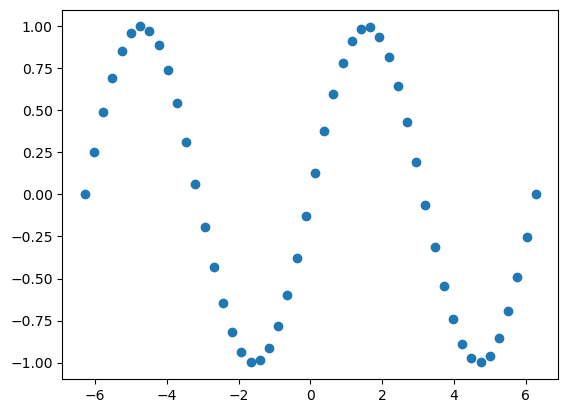

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# data
x = np.linspace(-2*np.pi, 2*np.pi, 50)
y = np.sin(x)

# scatter plot
plt.figure()
plt.scatter(x,y);

Über die Option `marker=` lässt sich das Symbol einstellen, mit dem das
Streudiagramm erzeugt wird. Wie Sie sehen, ist ein ausgefüllter Kreis
voreingestellt. Lesen Sie auf der Internetseite 

> https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers

nach, welche Marker-Symbole existieren. Probieren Sie einige der Symbole hier
aus:

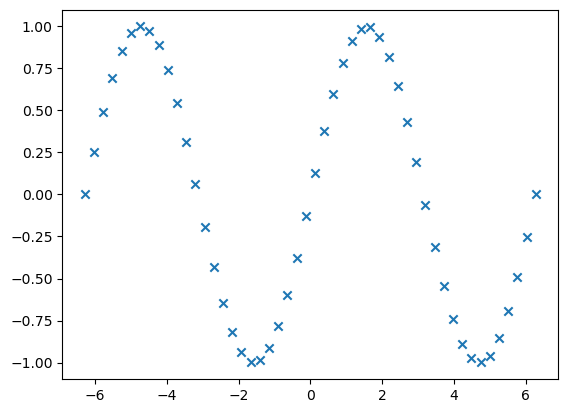

In [2]:
# data
x = np.linspace(-2*np.pi, 2*np.pi, 50)
y = np.sin(x)

# scatter plot
fig, ax = plt.subplots()
ax.scatter(x,y, marker='x');

Für bekannte Funktionen wie Sinus oder Kosinus würde man Liniendiagramme
verwenden. Streudiagramme eignen sich eher für die Visualisierung einzelner
Messungen. Wenn Sie beispielsweise an jeden Wochentag die Temperatur an zwei
Orten messen, bietet es sich an, beide Messreihen in einem Streudiagramm zu
visualisieren. Dazu sollten Sie unterschiedliche Marker und unterschiedliche
Farben verwenden.

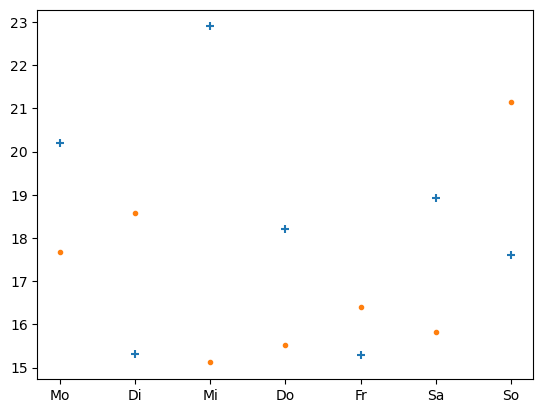

In [3]:
# data
x  = ['Mo', 'Di', 'Mi', 'Do', 'Fr', 'Sa', 'So']
y1 = np.random.uniform(15,23,7) # Zufallszahlen, um Temperaturmessung zu simulieren
y2 = np.random.uniform(15,23,7) # Zufallszahlen, um Temperaturmessung zu simulieren

# scatter plots
plt.figure()
plt.scatter(x, y1, marker='+')
plt.scatter(x, y2, marker='.');

Dann ist es aber auch gut, die Visualisierung zu beschriften. Dazu kennzeichnet
man jeden einzelnen Plot-Aufruf mit einem sogenannten Label, z.B.
`plt.scatter(x,y1, label='Messung1')`. Zuletzt verwendet man die Funktion
`legend()`, die eine Legende mit allen Label-Einträgen erzeugt, bei denen die
Farben der Kurven und die Marker korrekt zu den Namen (Labels) zugeordnet
werden.

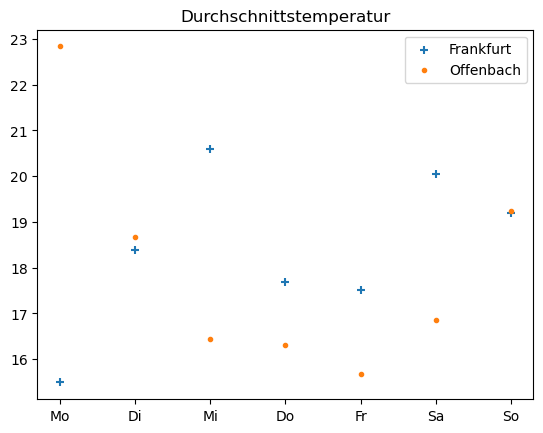

In [4]:
# data
x  = ['Mo', 'Di', 'Mi', 'Do', 'Fr', 'Sa', 'So']
y1 = np.random.uniform(15,23,7)
y2 = np.random.uniform(15,23,7)

# scatter plots
plt.figure()
plt.scatter(x, y1, marker='+', label='Frankfurt')
plt.scatter(x, y2, marker='.', label='Offenbach')
plt.legend()
plt.title('Durchschnittstemperatur');

```{admonition} Mini-Übung
:class: miniexercise 
Erzeugen Sie eine Wertetabelle mit den Zahlen 1 bis 50 für x und 50
normalverteilten Zufallszahlen mit Mittelwert 0 und Standardabweichung 1 für y.
Visualisieren Sie diese als Streudiagramm. Die Marker sollen rot gefärbte
Diamenten sein.
```

In [5]:
# Hier Ihr Code

````{admonition} Lösung
:class: miniexercise, toggle
```python
import matplotlib.pyplot as plt
import numpy as np

# data 
x = np.linspace(1, 50, 50)
y = np.random.normal(0, 1, 50)

# plot
plt.figure()
plt.scatter(x,y, c='red', marker='D')
```
````


## Zusammenfassung und Ausblick

Das Linien- und das Streudiagramm werden für die Visualisierung von
kontinuierlichen Daten verwendet, wohingegen das Balkendiagramm dem Plot von
diskreten Daten (Kategorien) dient. Im folgenden Abschnitt verknüpfen wir
Matplotlib mit Pandas zur Visualisierung von Tabellendaten in einem DataFrame.